In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [70]:
churn_data = pd.read_csv('data\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

-  RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
-  CustomerId — идентификатор клиента
-  Surname — фамилия клиента
-  CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
-  Geography — страна клиента (банк международный)
-  Gender — пол клиента
-  Age — возраст клиента
-  Tenure — сколько лет клиент пользуется услугами банка
-  Balance — баланс на счетах клиента в банке
-  NumOfProducts — количество услуг банка, которые приобрёл клиент
-  HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
-  IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
-  EstimatedSalary — предполагаемая заработная плата клиента
-  Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Сразу избавимся от от лишнего признака (RowNumber)

In [71]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Преобразуем значение признака 'Exited' для более информативного отображения на графике.

In [72]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Ушедшие' if x==1 else 'Лояльные')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Ушедшие
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Лояльные
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Ушедшие
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Лояльные
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Лояльные


    9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

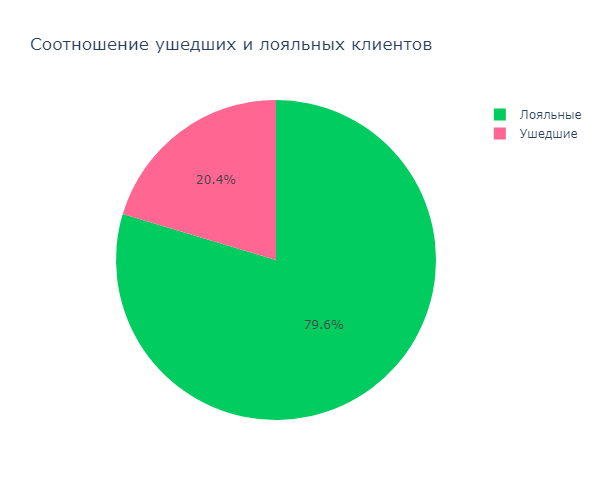

In [73]:
pie_graph = churn_data.groupby(by='Exited', as_index=False).count()

fig = px.pie(
    pie_graph,
    values='CustomerId',
    names=['Лояльные', 'Ушедшие'],
    height=500,
    width=600,
    color_discrete_sequence=['#00CC60', '#FF6692'],
    title='Соотношение ушедших и лояльных клиентов'
)
fig.show('png')

Как видно из графика, соотношение ушедших к лояльным клиентам 1 к 4. То есть на одного ушедшего приходится четыре лояльных клиента.

    9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

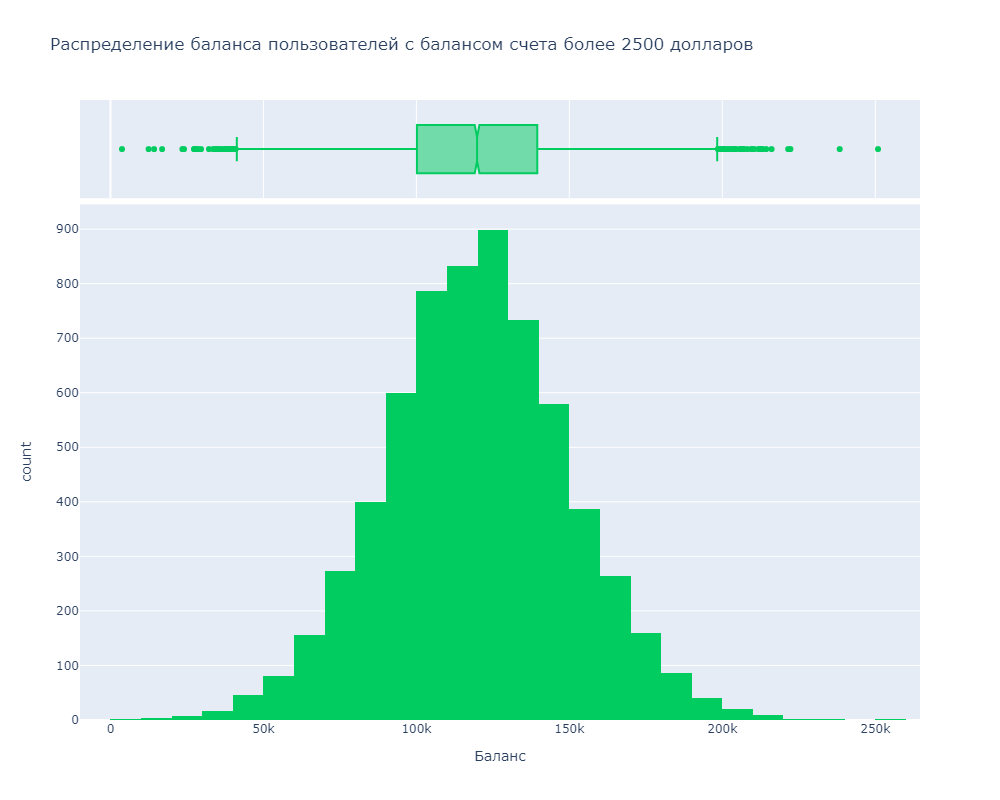

In [74]:
hist_graph = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    hist_graph,
    width=1000,
    height=800,
    x='Balance',
    nbins=40,
    title='Распределение баланса пользователей с балансом счета более 2500 долларов',
    marginal='box',
    color_discrete_sequence=['#00CC60'],
    labels={'Balance':'Баланс'}
)
fig.show('png')

Распределение клиентов выглядит таким образом, что основная масса клиентов имеет на счету от 100.000(q1) до 140.000(q3) долларов.<br> Имеются аномальные значения находящиеся за пределами как нижней, так и верхней границы. Но они ничтожно малы в абсолюном значении.<br> Возможно стоит сосредоточить внимание на основной массе клиентов.

    9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

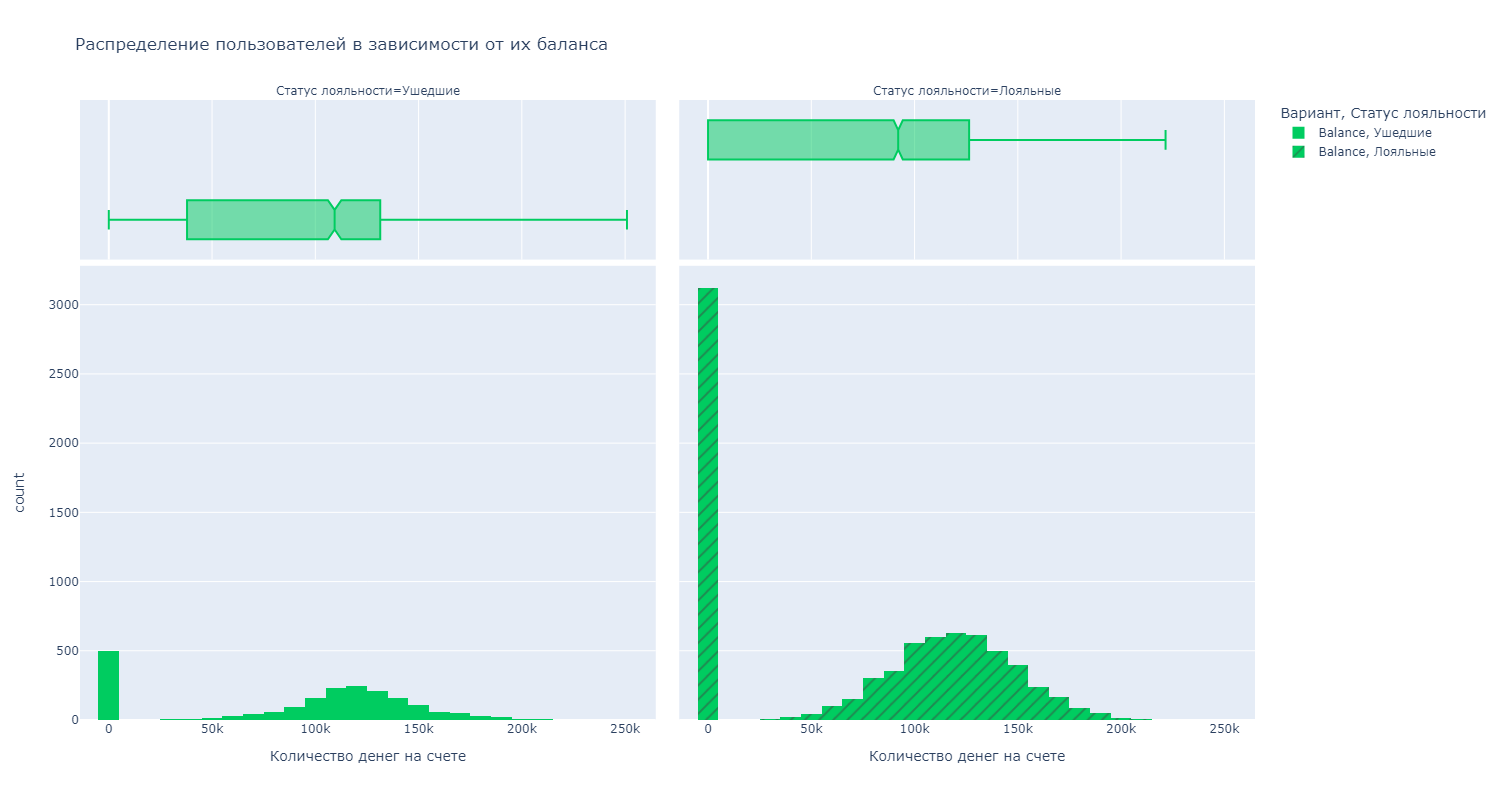

In [75]:
hist_graph = churn_data

fig = px.histogram(
    hist_graph,
    width=1500,
    height=800,
    x=['Balance'],
    nbins=40,
    title='Распределение пользователей в зависимости от их баланса',
    marginal='box',
    color_discrete_sequence=['#00CC60'],
    labels={'value':'Количество денег на счете', 'Exited': 'Статус лояльности', 'variable': 'Вариант', 'Balance':'Баланс'},
    pattern_shape='Exited',
    facet_col='Exited'
)
fig.show('png')

Если рассматривать распеделение баланса всех пользователей, то можно увидеть, что суммы на счетах ушедших и оставшихся клиентов практически не различаются.<br> Исключение составляет столбец с показателем до 5000 долларов. Он показывает, что довольно много клиентов из группы лояльных имеет на счету до 5000 долларов, либо пустой счет вовсе.<br> Примерная похожесть графиков лояльных и ушедших клиентов может говорить о том, что причина ухода не связана с количеством денег на счете.<br> Возможно продукты банка настроены так, что становятся привлекательными только для новых клиентов банка (отчего так много счетов с нулевым балансом) и никак не мотивируют людей, которые уже являются их клиентами.

    9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

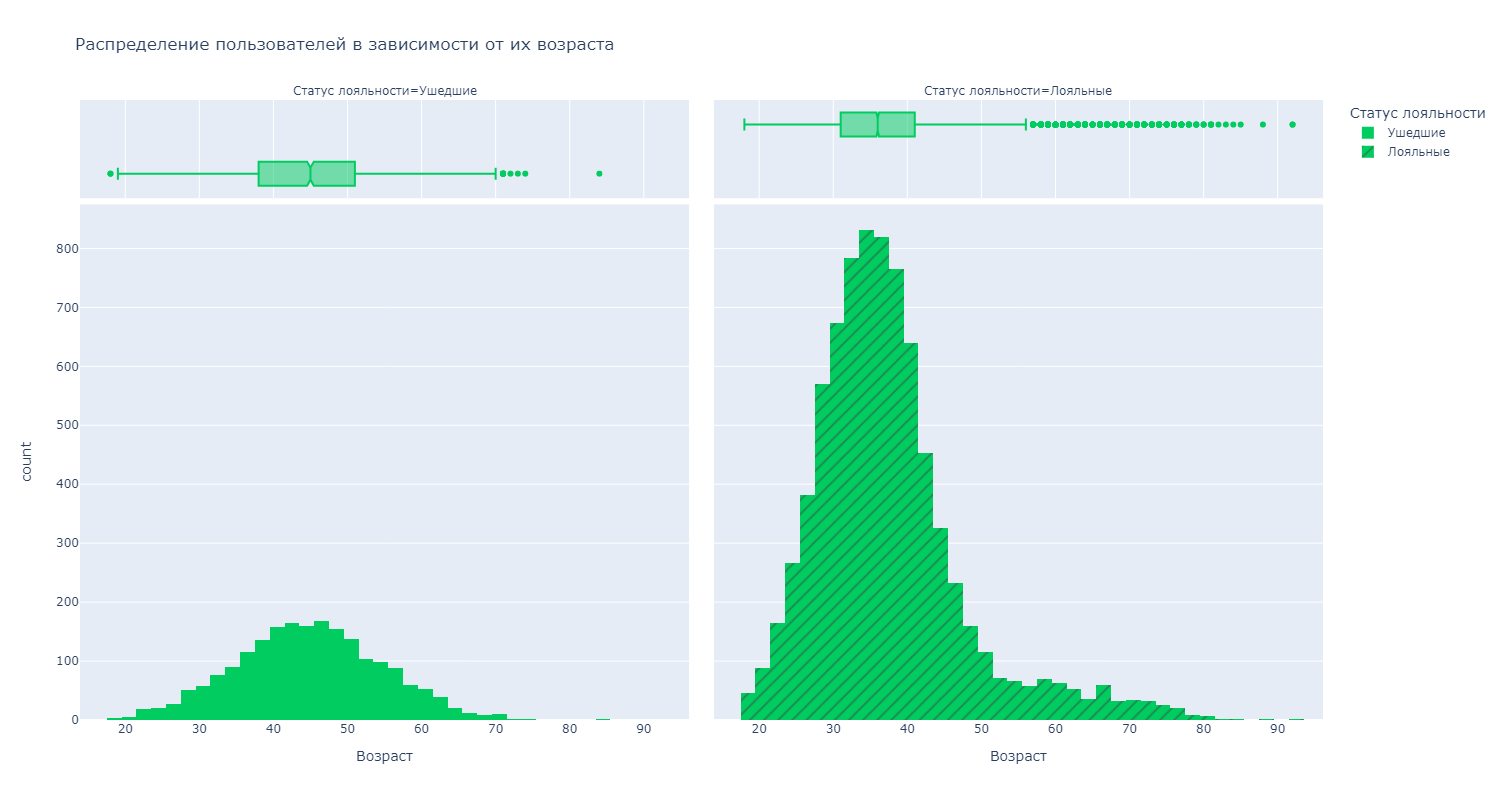

In [76]:
hist_graph = churn_data

fig = px.histogram(
    hist_graph,
    width=1500,
    height=800,
    x='Age',
    nbins=40,
    title='Распределение пользователей в зависимости от их возраста',
    marginal='box',
    color_discrete_sequence=['#00CC60'],
    labels={'Exited': 'Статус лояльности', 'variable': 'Вариант', 'Age':'Возраст'},
    pattern_shape='Exited',
    facet_col='Exited'
    
)
fig.show('png')

Из графика видно, что потенциальных выбросов больше в группе лояльных клиентов. Причем выбросы расположены выше верхней границы.<br> Это люди возрастной категории 57+ лет. Это может говорить о том, что люди этой возрастной категории более консервативны и не склонны  менять банк.<br> Основной группой лояльных клиентов являются люди в возрасте от 31 до 41 года. Что не пересекается с основной группой ушедших клиентов, возраст которых от 38 до 51 года.<br>

 В связи с тем, что возрастные группы от 31 до 41 года и 57+ лет являются лояльными банку, стоит обратить внимание на клиентов возрастной группы от 38 до 51 года,<br> так как они составляют основную массу ушедших людей и не пересекаются с возрастными группами лояльных клиентов.

    9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

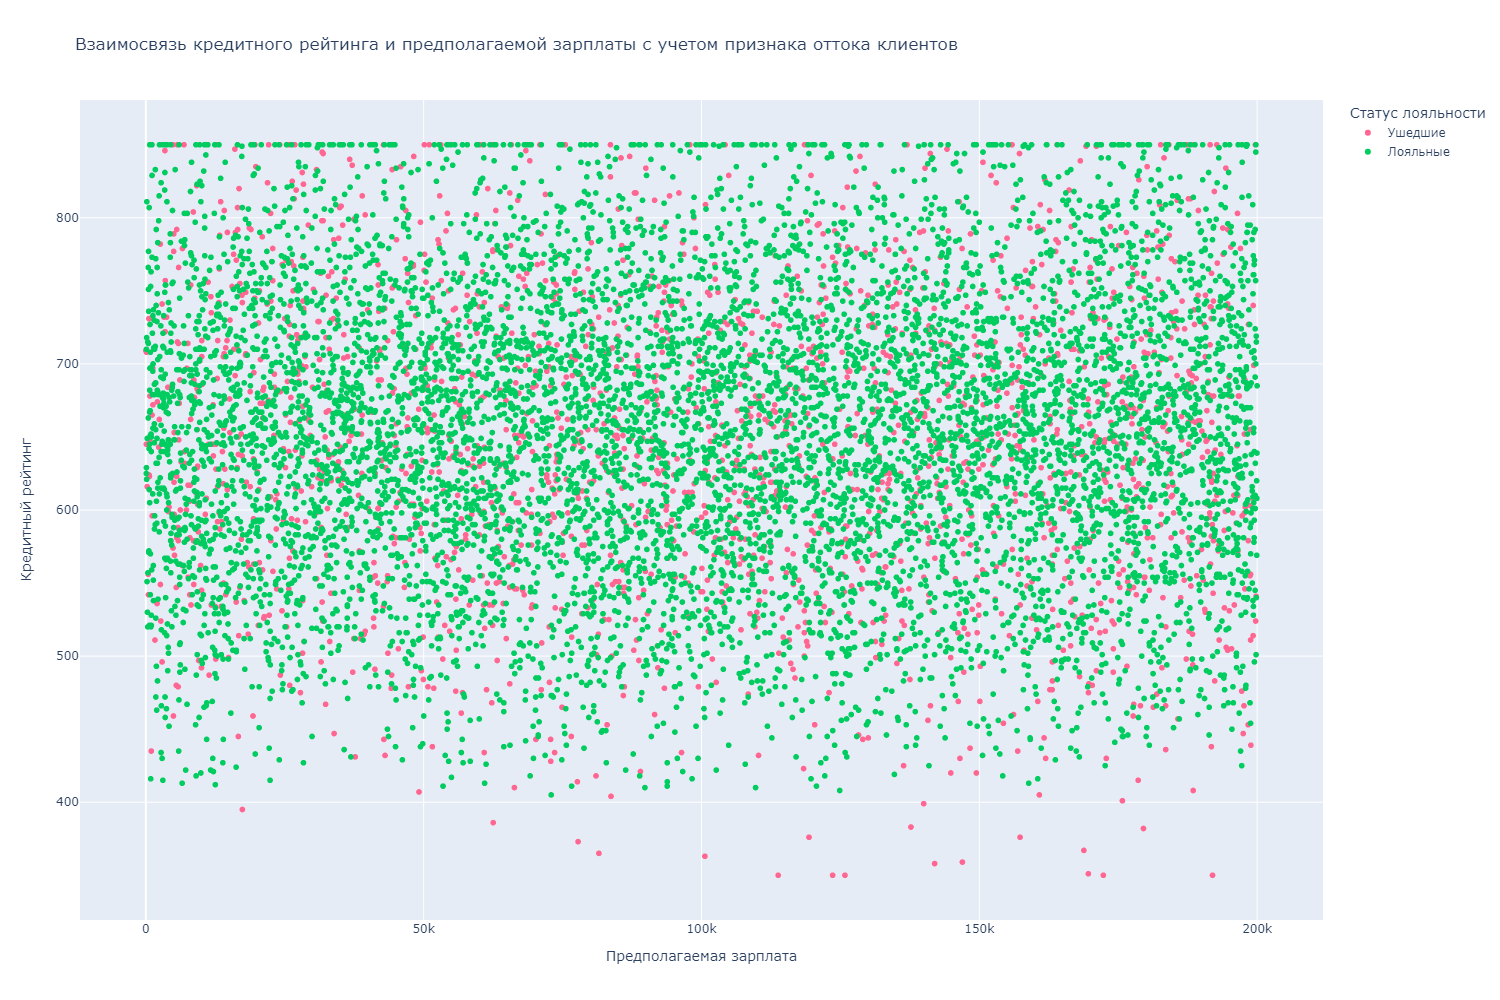

In [77]:
scatter_graph = churn_data

fig = px.scatter(
    scatter_graph,
    x='EstimatedSalary',
    y='CreditScore',
    height=1000,
    width=1500,
    color='Exited',
    color_discrete_sequence=['#FF6692', '#00CC60'],
    labels={'EstimatedSalary':'Предполагаемая зарплата', 'CreditScore':'Кредитный рейтинг', 'Exited':'Статус лояльности'},
    title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты с учетом признака оттока клиентов',
    
)
fig.show('png')

По графику не видно явной взаимосвязи между признаками. Однако стоит отметить, что все люди, чей кредитный рейтинг ниже 400 покинули банк.<br> Также видно, что основная масса клиентов сконцентрирована между 550 и 750 значениями кредитного рейтинга.

    9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

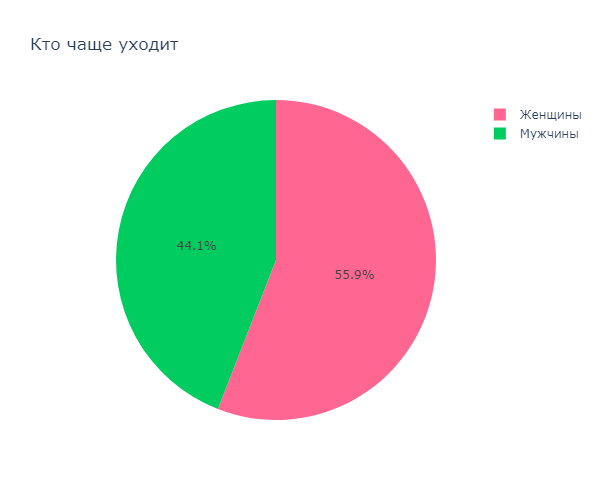

In [78]:
pie_graph = churn_data[churn_data['Exited']=='Ушедшие'].groupby(['Gender','Exited'])['CustomerId'].count()

fig = px.pie(
    pie_graph,
    values='CustomerId',
    names=['Женщины', 'Мужчины'],
    height=500,
    width=600,
    color_discrete_sequence=['#FF6692', '#00CC60'],
    title='Кто чаще уходит'
)
fig.show('png')

Из графика видно, что немного чаще уходят женщины, чем мужчины. Но явного преобладания не выявлено.

    9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

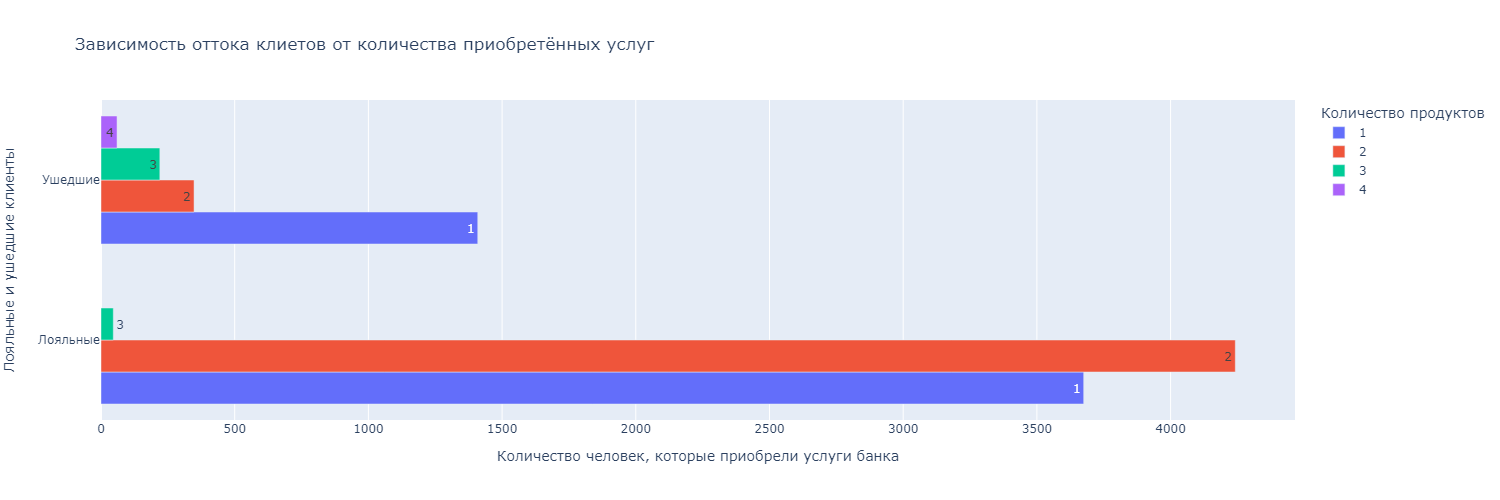

In [79]:
bar_graph = churn_data.groupby(['NumOfProducts','Exited'], as_index=False)['CustomerId'].count()
bar_graph['NumOfProducts'] = bar_graph['NumOfProducts'].astype(str)

fig = px.bar(
    bar_graph,
    x='CustomerId',
    y='Exited',
    height=500,
    width=1500,
    color='NumOfProducts',
    labels={'NumOfProducts':'Количество продуктов', 'Exited':'Лояльные и ушедшие клиенты', 'CustomerId':'Количество человек, которые приобрели услуги банка'},
    text='NumOfProducts',
    title='Зависимость оттока клиетов от количества приобретённых услуг',
    orientation='h',
    barmode='group'
)
fig.show('png')

Из графика получается, что отток клиентов с купленым максимальным пакетом продуктов банка 100%. Также очень много людей покинули банк имея 3 купленых продкута.<br> Это может говорить о том, что новые маркетинговые предложения банка не расчитаны на старых клиентов и предлагают новым пользователям более выгодные условия.<br> В итоге мы видим, что у банка остались клиенты почти только с минимальными пакетами услуг.

    9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

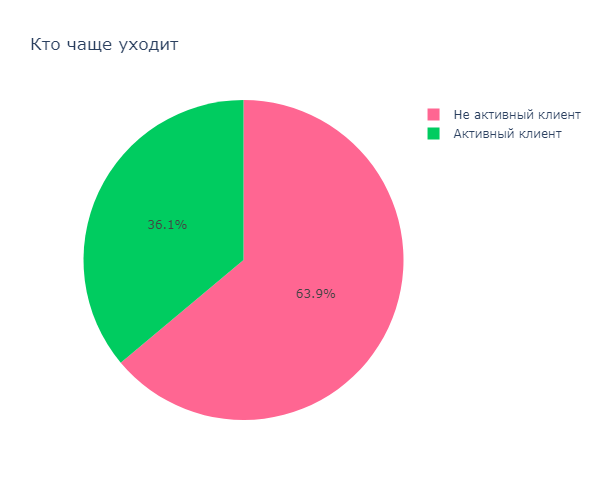

In [80]:
pie_graph = churn_data[churn_data['Exited']=='Ушедшие'].groupby(['IsActiveMember','Exited'],as_index=False)['CustomerId'].count()

fig = px.pie(
    pie_graph,
    names=['Не активный клиент', 'Активный клиент'],
    values='CustomerId',
    height=500,
    width=600,
    color_discrete_sequence=['#FF6692', '#00CC60'],
    labels={'CustomerId':'Количество клиентов'},
    title='Кто чаще уходит'
)
fig.show('png')

Отток клиентов наблюдается в основном из сектора не активных пользователей. Возможно стоит откоректировать программу лояльности для удержания неактивных клиентов  и перевода их в статус активных.

    9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

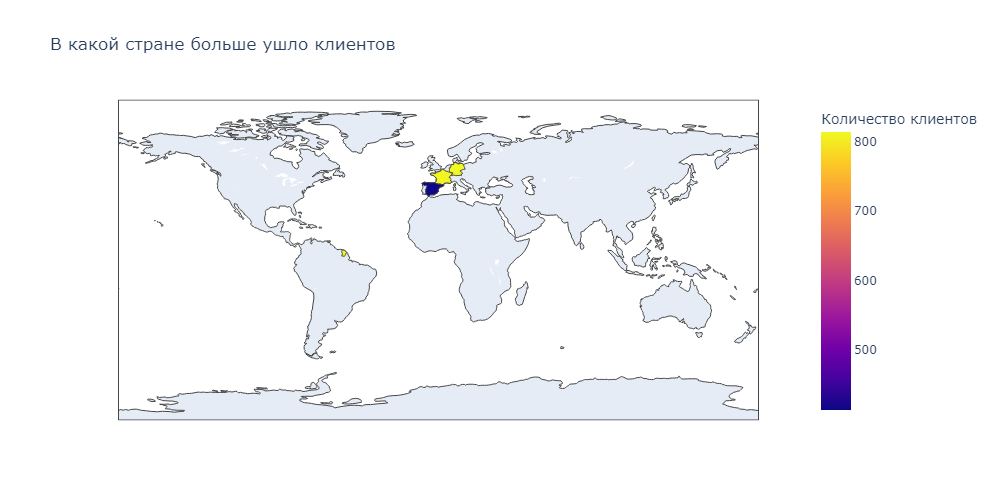

In [81]:
choropleth_graph = churn_data[churn_data['Exited']=='Ушедшие'].groupby('Geography',as_index=False)['CustomerId'].count()

fig = px.choropleth(
    choropleth_graph,
    locations='Geography',
    locationmode='country names',
    color='CustomerId',
    height=500,
    width=1000,
    labels={'CustomerId':'Количество клиентов', 'Geography':'Страна'},
    title='В какой стране больше ушло клиентов'
)
fig.show('png')

Больше всего клиентов ушло во Франции и в Германии. Возможно это связано с тем, что банк делает более выгодные предложения новым клиентам из Испании исключая другие страны.<br> 

    9.10. Переведите числовой признак CreditScore в категориальный. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

    На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

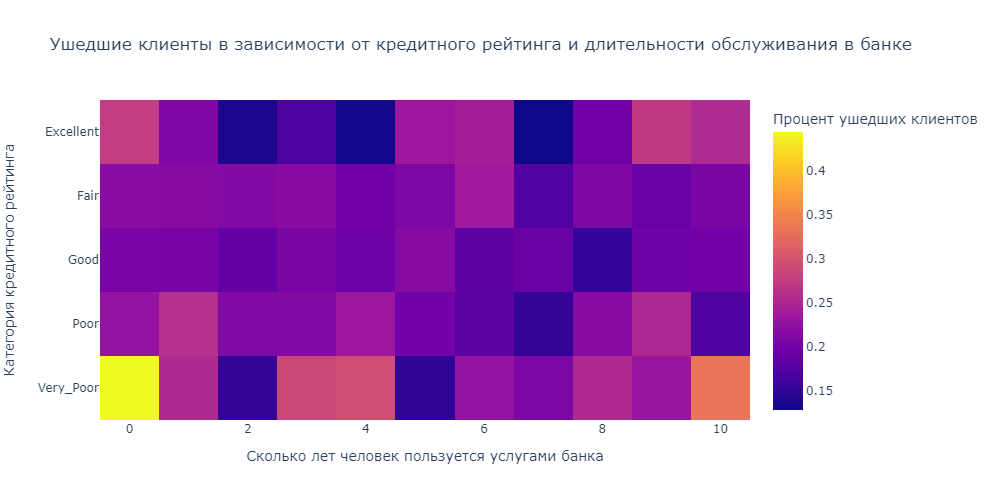

In [82]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 1 if x=='Ушедшие' else 0)
imshow_graph = churn_data.groupby(['CreditScoreCat','Tenure'])['Exited'].mean().unstack()

fig = px.imshow(
    imshow_graph,
    height=500,
    width=1000,
    title='Ушедшие клиенты в зависимости от кредитного рейтинга и длительности обслуживания в банке',
    labels={'y':'Категория кредитного рейтинга', 'x':'Сколько лет человек пользуется услугами банка', 'color':'Процент ушедших клиентов'}
)
fig.show('png')

Чаще всего уходят клиенты с очень плохим кредитным рейтингом и минимальным сроком обслуживания.<br>Также высок отток клиентов чей кредитный рейтинг также очень плох но обслуживался человек 10 лет.